In [2]:
import numpy as np
import pandas as pd

In [3]:
data_train = pd.read_csv('Train.csv')
data_test = pd.read_csv('Test.csv')
data_test.shape

(233, 7)

In [4]:
data_train.shape

(543, 8)

In [5]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
targets = train.IsUnderRisk
train.drop('IsUnderRisk',axis=1,inplace=True)

In [6]:
train.shape

(543, 7)

In [7]:
combined = train.append(test)

In [8]:
combined.reset_index(inplace=True)

In [9]:
combined.drop(['index'],1,inplace=True)

In [10]:
combined.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
dtype: int64

In [11]:
train_data = combined.iloc[0:543:]
test_data = combined.iloc[543:,:]

In [105]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [106]:
clf = RandomForestClassifier(n_estimators=50,max_features=1.0,verbose=1)
clf.fit(train_data,targets)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=1.0, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [107]:
features = pd.DataFrame()
features['Feature'] = train_data.columns
features['Importance'] = clf.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)

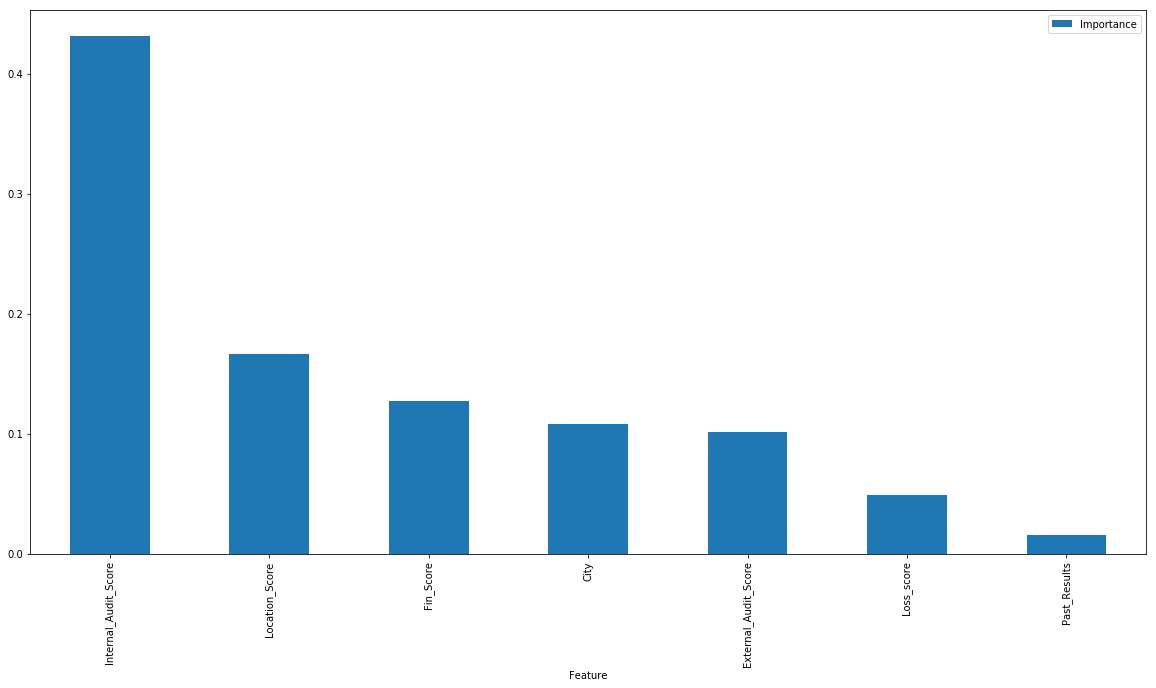

In [108]:
features.plot(kind='bar', figsize=(20, 10))

In [109]:
model = SelectFromModel(clf,prefit=True)

In [110]:
train_reduced = model.transform(train_data)
train_reduced.shape

(543, 2)

In [111]:
test_reduced = model.transform(test_data)

In [121]:
parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 20,
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': None}

model = RandomForestClassifier(**parameters)
model.fit(train_reduced, targets)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [122]:
from sklearn.model_selection import cross_val_score

def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)
compute_score(model, train_reduced, targets, scoring='accuracy')

0.8011043153244988

In [124]:
output = model.predict(test_reduced).astype(int)
output = model.predict_proba(test_reduced)
print(output)

[[0.035      0.965     ]
 [0.6935524  0.3064476 ]
 [0.68115565 0.31884435]
 [0.         1.        ]
 [0.17214362 0.82785638]
 [0.93434649 0.06565351]
 [0.89658189 0.10341811]
 [0.93434649 0.06565351]
 [0.48475608 0.51524392]
 [0.         1.        ]
 [0.         1.        ]
 [0.84791966 0.15208034]
 [0.57579212 0.42420788]
 [0.52450216 0.47549784]
 [0.36052488 0.63947512]
 [0.64212607 0.35787393]
 [0.48178007 0.51821993]
 [0.74595779 0.25404221]
 [0.31772727 0.68227273]
 [0.01       0.99      ]
 [0.70091504 0.29908496]
 [0.57450216 0.42549784]
 [0.95641608 0.04358392]
 [0.65402167 0.34597833]
 [0.85289715 0.14710285]
 [0.38520327 0.61479673]
 [0.16722569 0.83277431]
 [0.         1.        ]
 [0.         1.        ]
 [0.74846334 0.25153666]
 [0.64964286 0.35035714]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.84449856 0.15550144]
 [0.62257451 0.37742549]
 [0.         1.        ]
 [0.65458042 0.34541958]
 [0.94847061 0.05152939]
 [0.7082967  0.2917033 ]


In [125]:
model.score(train_reduced,targets)

0.8821362799263351

In [78]:
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
bag = BaggingClassifier(RandomForestClassifier(),n_estimators=50,max_samples=0.5,max_features=1.0)

In [72]:
bag.fit(train_data,targets)

C:\Users\Lenovo\3D Objects\ana\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Lenovo\3D Objects\ana\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Lenovo\3D Objects\ana\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Lenovo\3D Objects\ana\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Lenovo\3D Objects\ana\lib\site-packages\skl

C:\Users\Lenovo\3D Objects\ana\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Lenovo\3D Objects\ana\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Lenovo\3D Objects\ana\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Lenovo\3D Objects\ana\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Lenovo\3D Objects\ana\lib\site-packages\skl

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.5, n_estimators=50, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [73]:
bag.score(train_data,targets)

0.9576427255985267

In [74]:
out = bag.predict_proba(test_data)

In [75]:
out = pd.DataFrame(out)

In [76]:
out.to_excel(excel_writer='sub_2.xlsx')

In [77]:
print(out)

         0      1
0    0.030  0.970
1    0.354  0.646
2    0.828  0.172
3    0.010  0.990
4    0.250  0.750
5    0.652  0.348
6    0.864  0.136
7    0.824  0.176
8    0.250  0.750
9    0.044  0.956
10   0.078  0.922
11   0.864  0.136
12   0.402  0.598
13   0.684  0.316
14   0.052  0.948
15   0.760  0.240
16   0.420  0.580
17   0.582  0.418
18   0.258  0.742
19   0.000  1.000
20   0.678  0.322
21   0.568  0.432
22   0.292  0.708
23   0.880  0.120
24   0.746  0.254
25   0.036  0.964
26   0.268  0.732
27   0.024  0.976
28   0.066  0.934
29   0.732  0.268
..     ...    ...
203  0.050  0.950
204  0.004  0.996
205  0.658  0.342
206  0.246  0.754
207  0.158  0.842
208  0.680  0.320
209  0.062  0.938
210  0.494  0.506
211  0.020  0.980
212  0.502  0.498
213  0.046  0.954
214  0.814  0.186
215  0.060  0.940
216  0.786  0.214
217  0.416  0.584
218  0.460  0.540
219  0.846  0.154
220  0.586  0.414
221  0.428  0.572
222  0.834  0.166
223  0.430  0.570
224  0.034  0.966
225  0.344  0.656
226  0.532

In [98]:
adb = AdaBoostClassifier(RandomForestClassifier(n_estimators=20),n_estimators=20)

In [99]:
adb.fit(train_data,targets)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=20, random_state=None)

In [100]:
adb.score(train_data,targets)

1.0

In [102]:
out_adb = adb.predict_proba(test_data)

In [126]:
out_adb = pd.DataFrame(output)

In [128]:
out_adb.to_excel(excel_writer='sub___2.xlsx')